In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [43]:
df = pd.read_csv('../csv/AAPL.csv', parse_dates=[0])
df.set_index(df.columns[0], inplace=True)
df.rename(columns={df.columns[0]: 'Date'})
df = df.fillna(method='bfill')
df.head()

,close,open,high,low,adjusted close,volume,WILLR_14,SMI_7_14_5,SMIs_7_14_5,SMIo_7_14_5,...,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,SMA_14,EMA_14,VWAP_D,HMA_14,CMF_20
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1999-11-01,77.62,80.00,80.69,77.37,0.589786,2487300.0,-39.715965,0.350263,0.350263,0.0,...,75.071153,82.26,89.448847,17.478354,0.920791,88.007143,88.007143,78.560000,90.933079,0.131068
1999-11-02,80.25,78.00,81.69,77.31,0.609769,3564600.0,-39.715965,0.350263,0.350263,0.0,...,75.071153,82.26,89.448847,17.478354,0.920791,88.007143,88.007143,79.750000,90.933079,0.131068
1999-11-03,81.50,81.62,83.25,81.00,0.619267,2932700.0,-39.715965,0.350263,0.350263,0.0,...,75.071153,82.26,89.448847,17.478354,0.920791,88.007143,88.007143,81.916667,90.933079,0.131068
1999-11-04,83.62,82.06,85.37,80.62,0.635376,3384700.0,-39.715965,0.350263,0.350263,0.0,...,75.071153,82.26,89.448847,17.478354,0.920791,88.007143,88.007143,83.203333,90.933079,0.131068
1999-11-05,88.31,84.62,88.37,84.00,0.671012,3721500.0,-39.715965,0.350263,0.350263,0.0,...,75.071153,82.26,89.448847,17.478354,0.920791,88.007143,88.007143,86.893333,90.933079,0.131068


In [6]:
os.getcwd()

'D:\\Document\\TLCN\\comprehensive-stockmarket-tool\\notebooks'

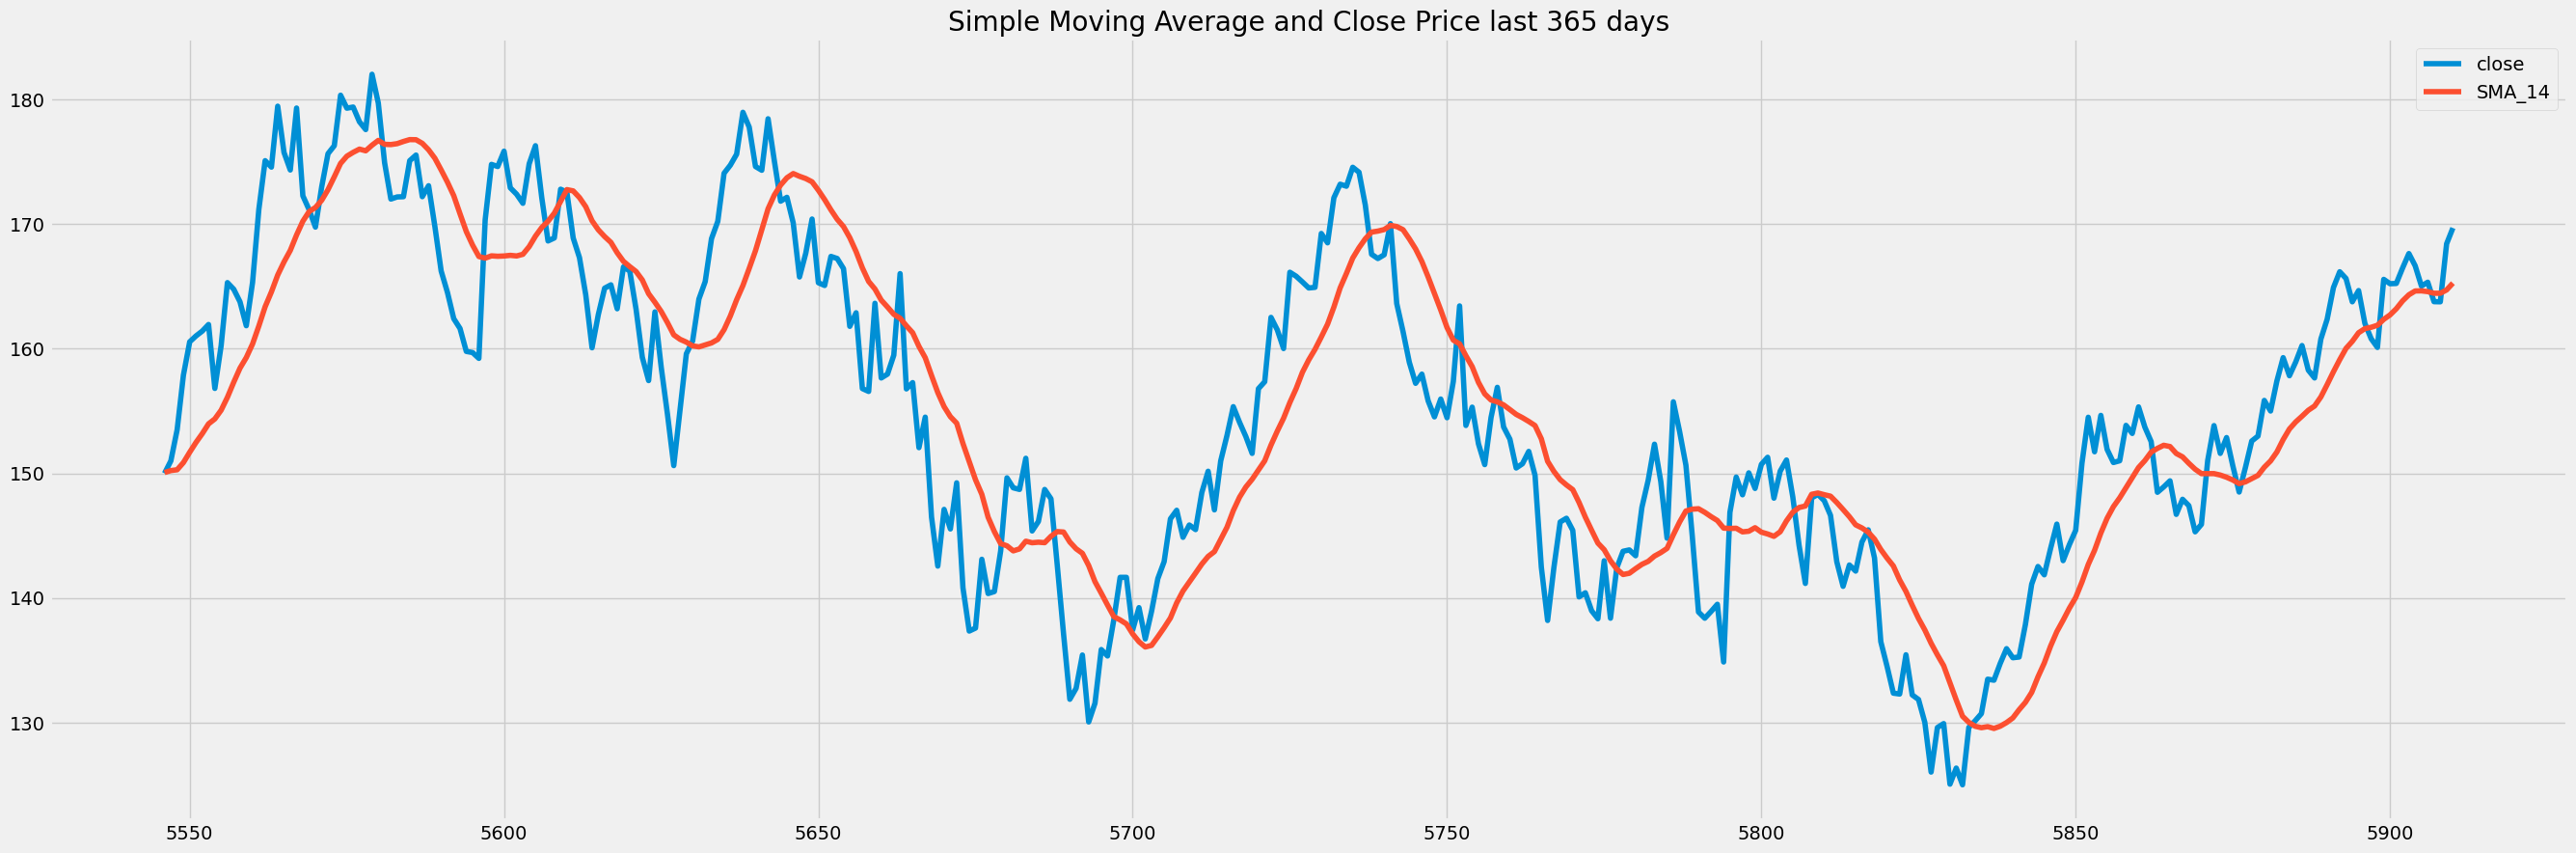

In [27]:
df[['close', 'SMA_14']].tail(365).plot(figsize=(30,10))
plt.title('Simple Moving Average and Close Price last 365 days')
plt.show()

In [49]:
n = 90
last_n_days = df[-n:]
fig = go.Figure(data=[go.Candlestick(x = last_n_days.index,
                                     open = last_n_days['open'],
                                     high = last_n_days['high'],
                                     low = last_n_days['low'],
                                     close = last_n_days['close'])])

fig.update_layout(title = 'Last ' + str(n) + ' days',
                  xaxis_rangeslider_visible=False)

fig.show()

In [78]:
import os
print(os.getcwd())
os.chdir('D:/Document/TLCN/comprehensive-stockmarket-tool/NLP/news_data/AAPL')
print(os.getcwd())


D:\Document\TLCN\comprehensive-stockmarket-tool\notebooks
D:\Document\TLCN\comprehensive-stockmarket-tool\NLP\news_data\AAPL


In [ ]:
import finnhub
import pandas as pd
import datetime
from datetime import datetime as dt
def increase_n_days(date, n_days):
    date_obj = datetime.datetime.strptime(date, '%Y-%m-%d').date()
    date_obj += datetime.timedelta(days=n_days)
    return date_obj.strftime('%Y-%m-%d')
from_d = "2022-07-01"
to_d = "2023-05-16"
# to_d = increase_n_days(from_d, 10)
finnhub_client = finnhub.Client(api_key="chdrr1pr01qi6ghjsatgchdrr1pr01qi6ghjsau0")

df = pd.DataFrame(finnhub_client.company_news('AAPL', _from=from_d, to=to_d))
df['datetime'] = df['datetime'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df.set_index('datetime', inplace=True)
df = df.sort_values('datetime')
index_value = df.index.tolist()
# from_d = increase_n_days(index_value[-1], 10)
# to_d = increase_n_days(from_d, 12)

In [77]:
from_d = to_d
to_d = increase_n_days(from_d, 10)
finnhub_client = finnhub.Client(api_key="chdrr1pr01qi6ghjsatgchdrr1pr01qi6ghjsau0")

df1 = pd.DataFrame(finnhub_client.company_news('AAPL', _from=from_d, to=to_d))
df1['datetime'] = df1['datetime'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
df1.set_index('datetime', inplace=True)
df1 = df1.sort_values('datetime')
df = pd.concat([df, df1], ignore_index=False)
df1.drop(df1.index, inplace=True)

In [82]:
df.to_csv('AAPl_news_1.csv', index=True)

In [80]:
df.drop_duplicates(subset='id', keep='first', inplace=True)